# Code Snippets zu Versuch 241

#### https://www.physi.uni-heidelberg.de/Einrichtungen/AP/info/Corona/Corona.php

#### Messdaten: https://www.physi.uni-heidelberg.de/Einrichtungen/AP/info/Corona/241%20Messdaten.zip

#### Messdaten entpacken und kopiere die Messdaten in dein Notebookeordner oder gebe bei der Funktion np.loadtxt() den Pfad zu den Daten an.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#%matplotlib inline
#%matplotlib qt5
%matplotlib notebook

### Aufgabe 1: Zeitkonstante eines RC-Glieds

#### Plotten der Daten

<IPython.core.display.Javascript object>


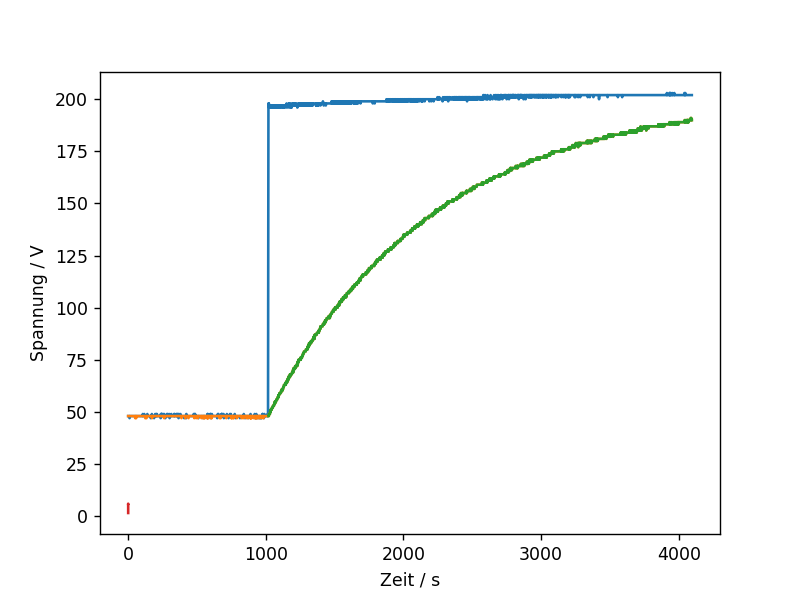

In [2]:
zeit_0 , ausgang_0, eingang_0 = np.loadtxt('Messung1_ RC1.txt', skiprows=10, unpack=True)
plt.plot(zeit_0 , eingang_0)
plt.plot(zeit_0 , ausgang_0)

#### Plotte nur ein Ausschnitt der Spannung über dem Kondensator

In [3]:
zeit_1 = zeit_0[1020:]
ausgang_1 = ausgang_0[1020:]
plt.plot(zeit_1 ,ausgang_1)

#### Skaliere die Achsen. Schaue dir dazu die Kopfzeilen der Messdatei an!

In [4]:
zeit = zeit_1 / 125 * 50e-6
ausgang = ausgang_1 / 32 * 1
plt.plot(zeit ,ausgang)
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')

Text(0, 0.5, 'Spannung / V')

#### Fitte eine exp - Funktion an die Daten. Formel (4) im Skript.

In [5]:
def fit_function_1(t, Ue, tau, offset):
    return Ue * (1 - np.exp(-t/tau)) + offset

popt_1 , pcov_1 = curve_fit(fit_function_1, zeit ,ausgang,  p0 = [10, 0.0005 , -5] )
print(popt_1)

[ 1.11574766e+01  4.81304859e-04 -4.85466334e+00]


#### Plotte die Daten und die Fitfunktion

<IPython.core.display.Javascript object>


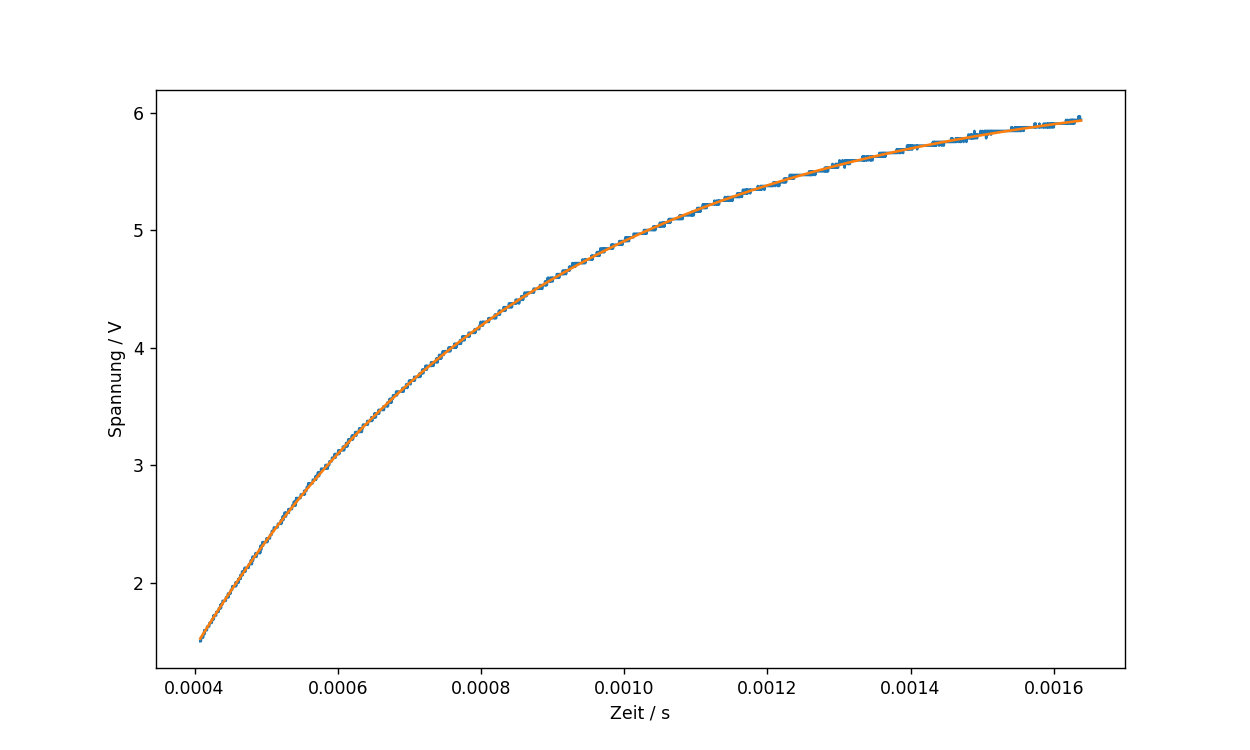

Text(0, 0.5, 'Spannung / V')

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(zeit , ausgang)
plt.plot(zeit , fit_function_1(zeit, *popt_1))
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')

#### Zum besseren Vergleich plotte nur jeden 100. Messwert der Daten

<IPython.core.display.Javascript object>


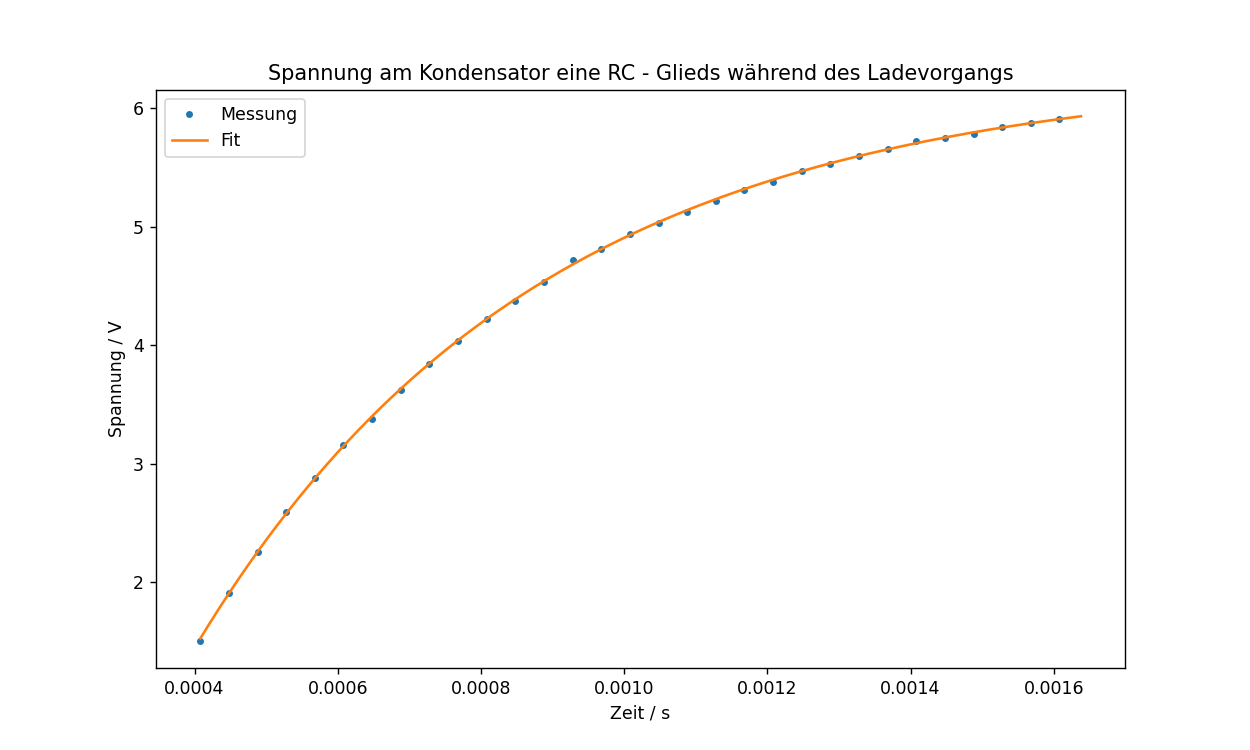

Text(0.5, 1.0, 'Spannung am Kondensator eine RC - Glieds während des Ladevorgangs')

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(zeit[::100] , ausgang[::100] , linestyle = "None" , marker = "." , label = "Messung")
plt.plot(zeit , fit_function_1(zeit, *popt_1) , label = "Fit")
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
plt.title("Spannung am Kondensator eine RC - Glieds während des Ladevorgangs")

#### Berechne die Zeitkonstante tau und vergleiche mit der Theorie. Fehler abschätzen! Schau dir dazu pcov_1[1,1] an und berücksichtige die Bauteiltoleranzen wie im Skript angegeben. Wiederhole die Auswertung für die anderen RC - Kombinationen. 

In [8]:
print("Zeitkonstante theoretisch: tau_theoretisch = " + str(1000 *470e-9) + " s") # tau_theo = R*C = 1000 Ohm * 470 nF
print("Zeitkonstante aus Messung: tau_messung = " + str(popt_1[1]) + " s")

Zeitkonstante theoretisch: tau_theoretisch = 0.00047 s
Zeitkonstante aus Messung: tau_messung = 0.0004813048588401885 s


### Aufgabe 3. Frequenzgang eines RC-Glied

#### Plot des Tiefpassfilters

<IPython.core.display.Javascript object>


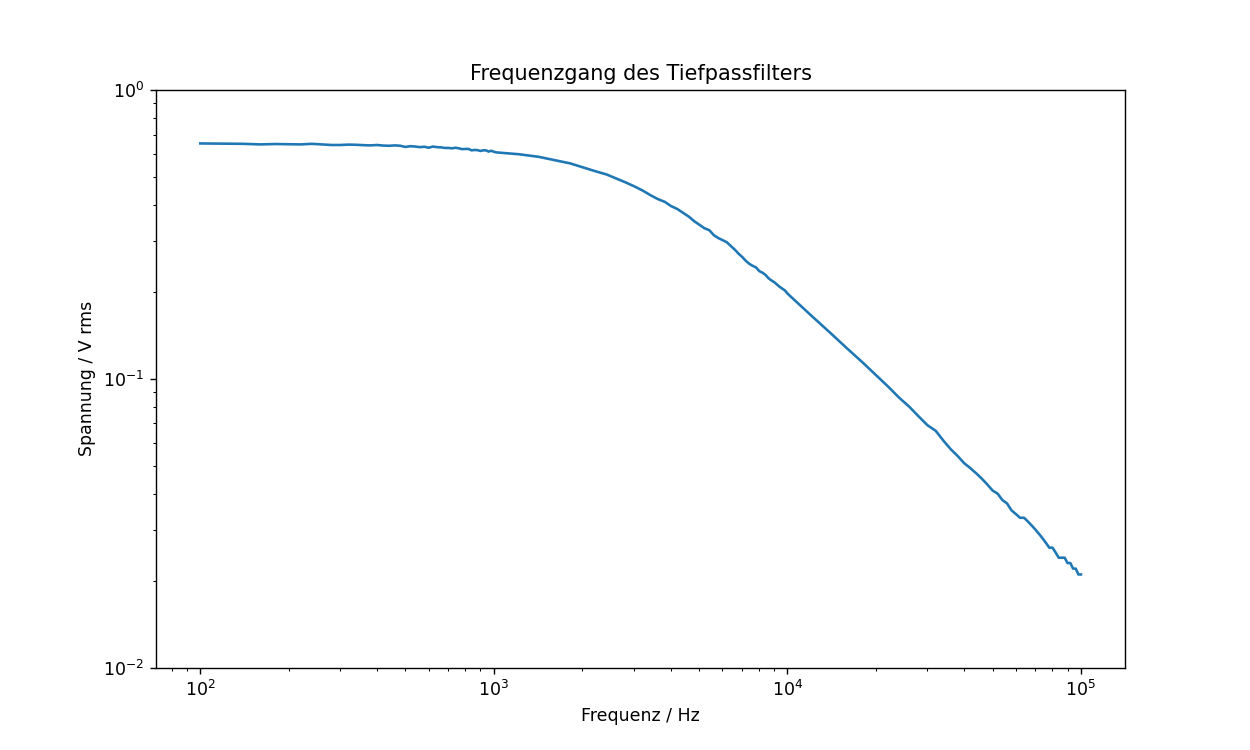

Text(0.5, 1.0, 'Frequenzgang des Tiefpassfilters')

In [9]:
frequenz_1 , effekivwert_1 , effekivwert_1_log = np.loadtxt('Messung3_Tiefpassfilter.txt', skiprows = 1, unpack = True)
plt.figure(figsize=(10, 6))
plt.plot(frequenz_1 , effekivwert_1)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.title("Frequenzgang des Tiefpassfilters")

#### Fitte eine Funktion an die Daten. Abbildung 6 im Skript. Plotte die Daten und die Fitfunktion. Zum besseren Vergleich plotte nur jeden 3. Messwert der Daten

<IPython.core.display.Javascript object>


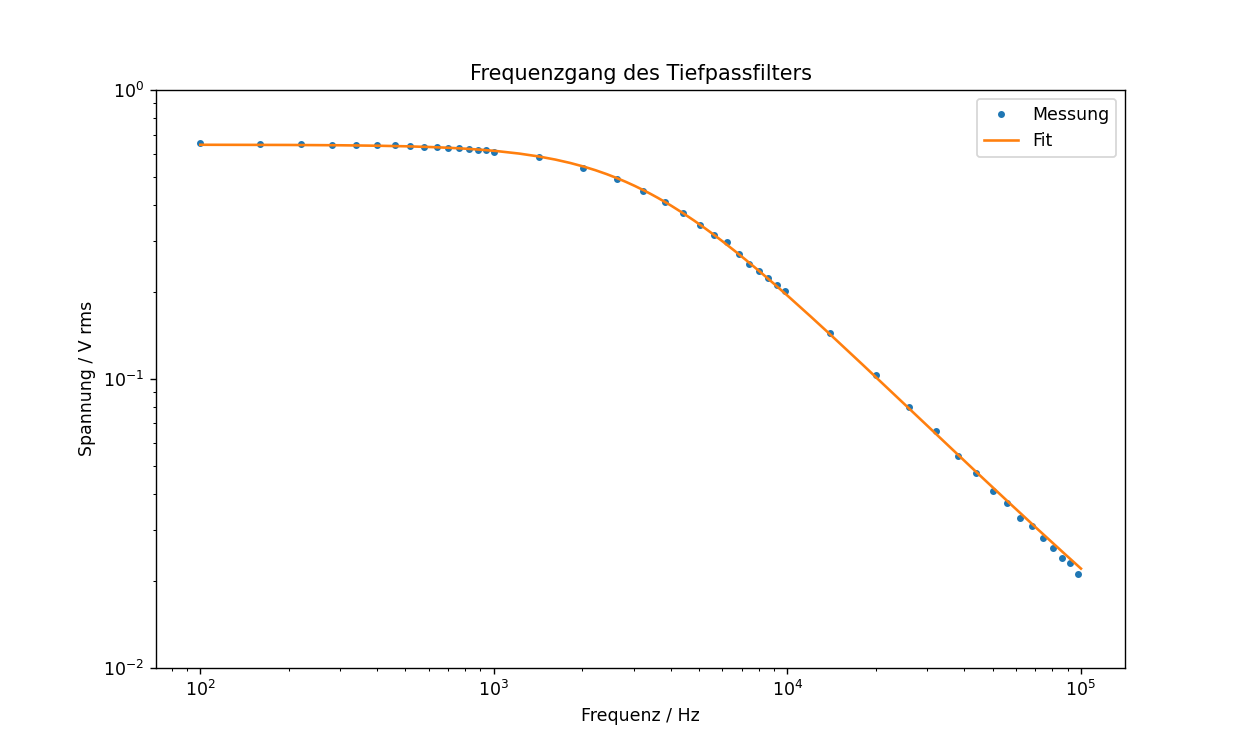

[6.44604867e-01 5.09282924e-05 1.87408227e-03]


In [10]:
def fit_function_2(f, Ue, tau_2, offset):
    return Ue / np.sqrt(1 + (2 * np.pi * f *tau_2) **2) + offset

popt_2 , pcov_2 = curve_fit(fit_function_2, frequenz_1 , effekivwert_1 , p0 = [1, 0.0004 , 0.01] )

plt.figure(figsize=(10, 6))
plt.plot(frequenz_1[::3] , effekivwert_1[::3] , linestyle = "None" , marker = "." , label = "Messung")
plt.plot(frequenz_1 , fit_function_2(frequenz_1, *popt_2), label = "Fit")

plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()
plt.title("Frequenzgang des Tiefpassfilters")



#plt.plot(frequenz_1 ,1/((2*np.pi*frequenz_1)*7.553e-05), color='r')
#plt.axhline(y=0.653, xmin=0, xmax=1, color='r')
#plt.axvline(x=3220, ymin=0, ymax=0.98, color='r')

print(popt_2)

#### Bestimme die Bandbreite aus dem theoretischen Wert und aus dem Fit

In [11]:
print("Bandbreite theoretisch:  = " + str(1 / (1000 *47e-9) / (2 * np.pi)) + " Hz") # 1 / (R*C)= 1 / (1000 Ohm * 47 nF)
print("Bandbreite experimentell:  = " + str(1 / popt_2[1] / (2 * np.pi)) + " Hz")

Bandbreite theoretisch:  = 3386.2753849339438 Hz
Bandbreite experimentell:  = 3125.079115397566 Hz


#### Fehler abschätzen! Schau dir dazu pcov_2[1,1] an und berücksichtige die Bauteiltoleranzen wie im Skript angegeben. Wiederhole die Auswertung für den Hochpassfilter.

### Aufgabe 3. Phasengang eines RC-Glied

#### Plot des sinusförmigen Eingangs- und Ausgangssignals des RC - Glieds

<IPython.core.display.Javascript object>


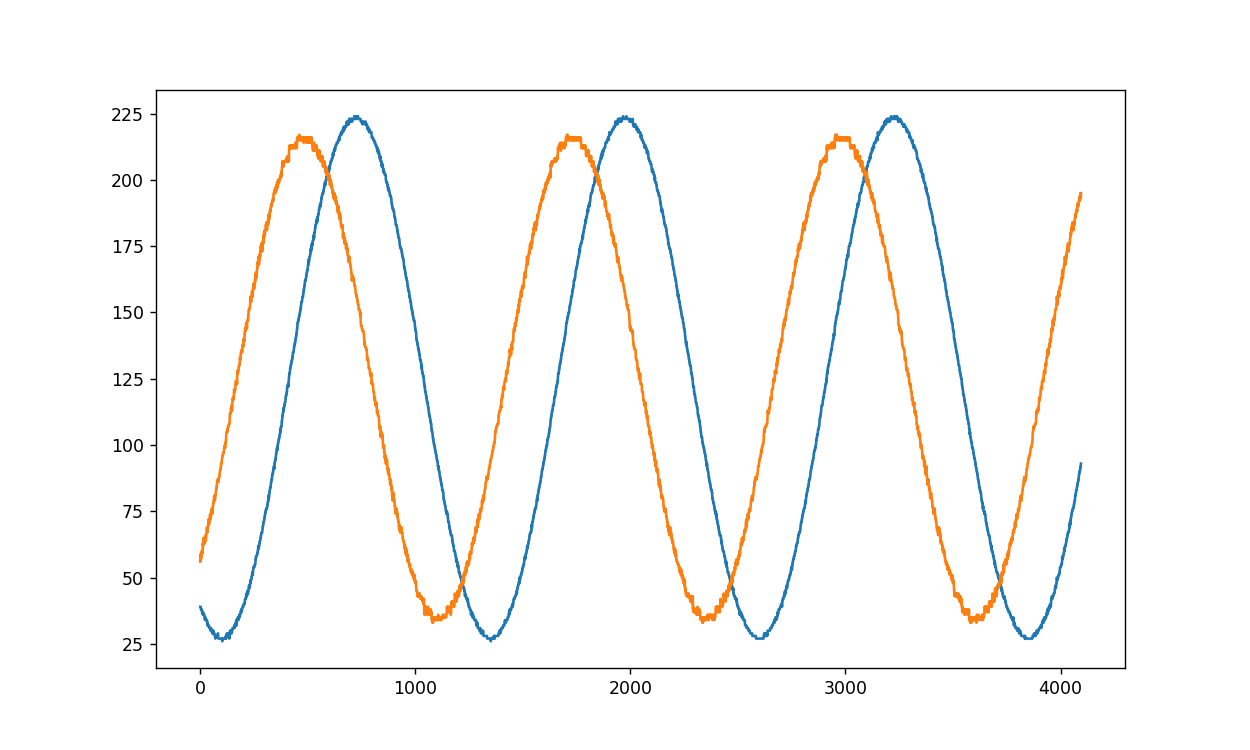

In [12]:
zeit_1 , ausgang_1, eingang_1 = np.loadtxt('Messung3_Phase_1k.txt', skiprows=10, unpack=True)
plt.figure(figsize=(10, 6))
plt.plot(zeit_1 , eingang_1)
plt.plot(zeit_1 , ausgang_1)

#### Skaliere die Achsen. Schaue dir dazu die Kopfzeilen der Messdatei an!

<IPython.core.display.Javascript object>


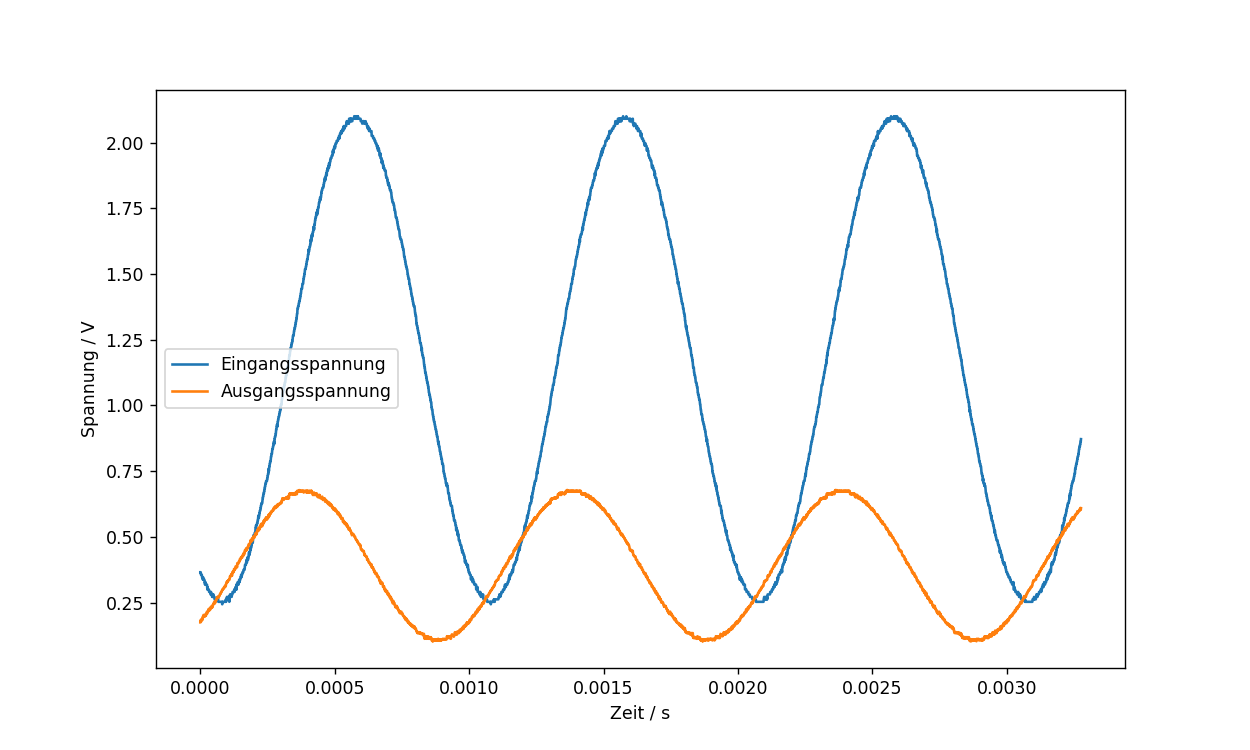

In [13]:
zeit_2 = zeit_1 / 125 * 0.0001
ausgang_2 = ausgang_1 / 32 * 0.1
eingang_2 = eingang_1 / 32 * 0.3

plt.figure(figsize = (10, 6))
plt.plot(zeit_2 , eingang_2, label = "Eingangsspannung")
plt.plot(zeit_2 , ausgang_2, label = "Ausgangsspannung")

plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')

plt.legend()

#### Fitte ein Sinus an dein Eingangssignal

In [14]:
def sinus_eingang(t, Ue, phi_0, offset):
    return Ue * np.sin(2 * np.pi * 1000 * t + phi_0) + offset # 1000  entspricht der eingestellten Frequenz 1000 Hz

popt_3 , pcov_3 = curve_fit(sinus_eingang, zeit_2 ,eingang_2)

#### Plotte das Eingangssignal und den angefitteten Sinus. Nur jeder 50. Messwert wird übersichtshalber geplottet.

<IPython.core.display.Javascript object>


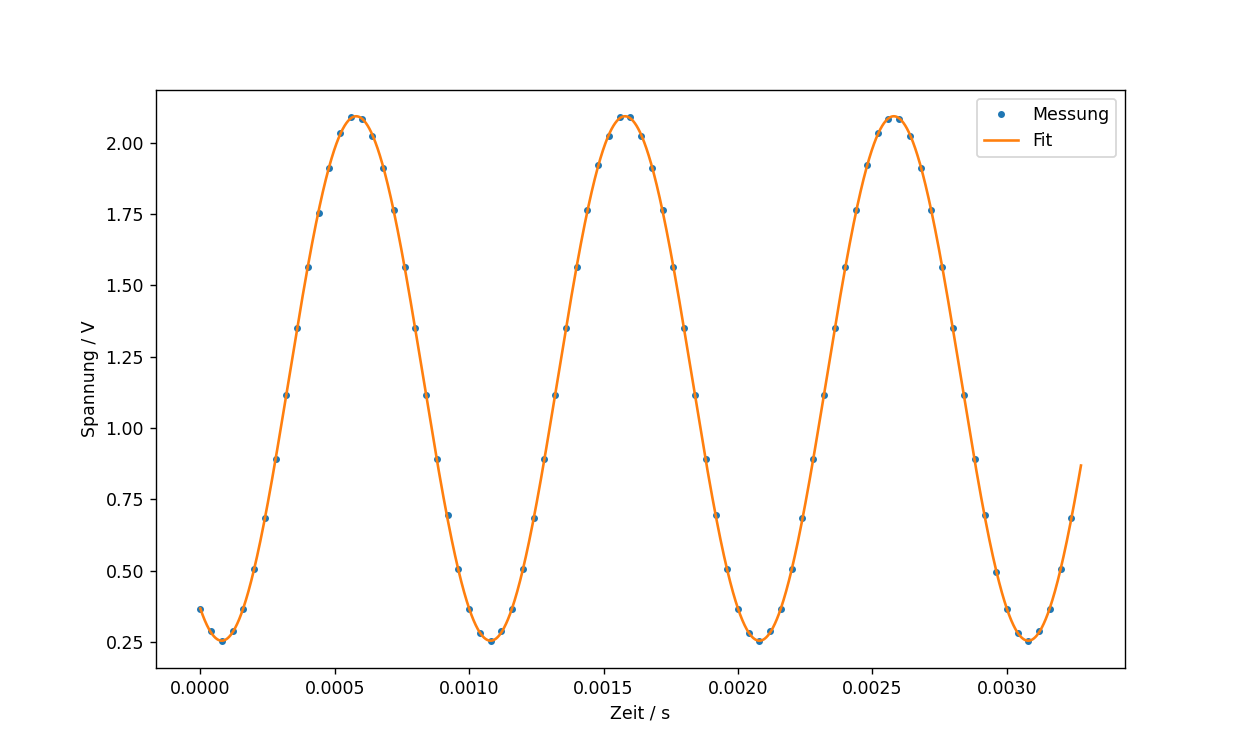

[-0.91880128  1.0691592   1.17382832]


In [15]:
plt.figure(figsize=(10, 6))
plt.plot(zeit_2[::50] , eingang_2[::50] , linestyle = "None" , marker = "." , label = "Messung")
plt.plot(zeit_2 , sinus_eingang(zeit_2 , *popt_3), label = "Fit")


plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()
print(popt_3)

#### Fitte nun ein Sinus an dein Ausgangssignal, jetzt mit einer zusätlichen Phase phi

In [16]:
def sinus_ausgang(t, Ue, phi, offset):
    return Ue * np.sin(2 * np.pi * 1000 * t + popt_3[1] + phi) + offset # 1000  entspricht der eingestellten Frequenz 1000 Hz

popt_4 , pcov_4 = curve_fit(sinus_ausgang, zeit_2 , ausgang_2)

<IPython.core.display.Javascript object>


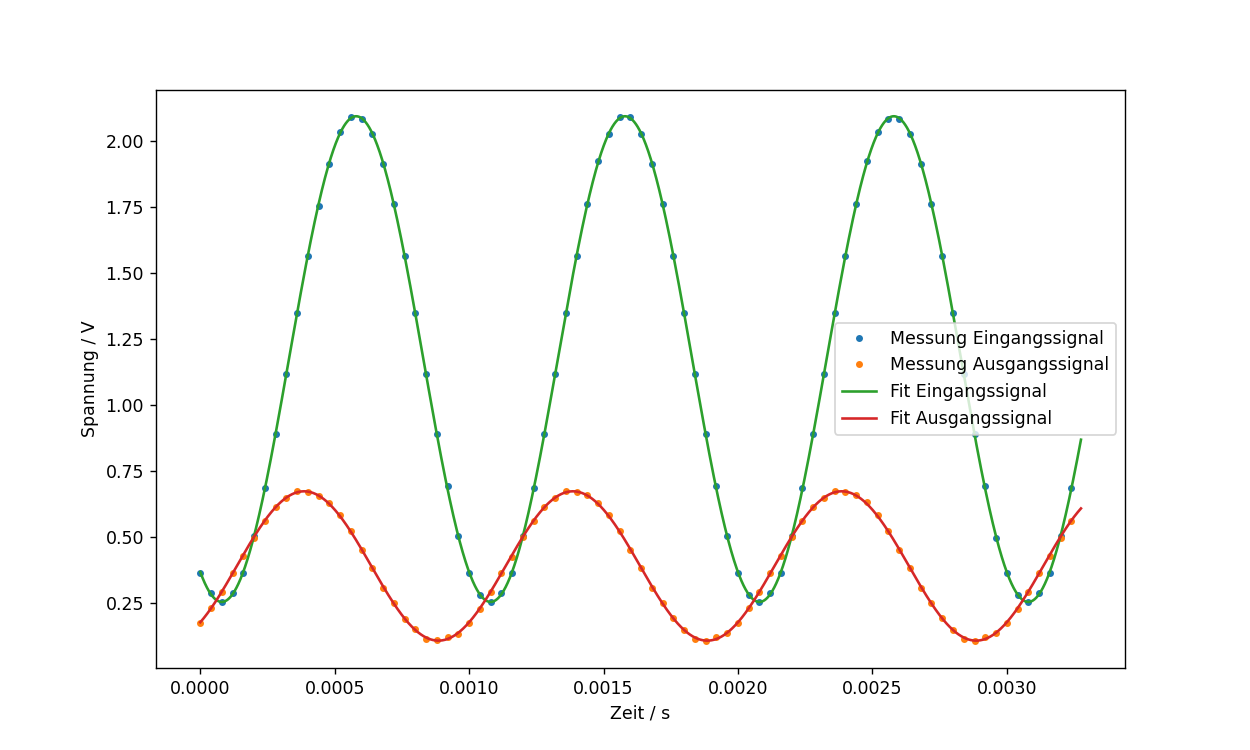

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(zeit_2[::50] , eingang_2[::50] , linestyle = "None" , marker = "." , label = "Messung Eingangssignal")
plt.plot(zeit_2[::50] , ausgang_2[::50] , linestyle = "None" , marker = "." , label = "Messung Ausgangssignal")
plt.plot(zeit_2 , sinus_eingang(zeit_2, *popt_3), label = "Fit Eingangssignal")
plt.plot(zeit_2 , sinus_ausgang(zeit_2, *popt_4), label = "Fit Ausgangssignal")
plt.xlabel('Zeit / s')
plt.ylabel('Spannung / V')
plt.legend()

#### Um beide Signale besser vergleichen zu können, skaliere ich das Ausgangssignal  willkürlich  um den Faktor 3.
#### Dies ändert nicht die Phase

<IPython.core.display.Javascript object>


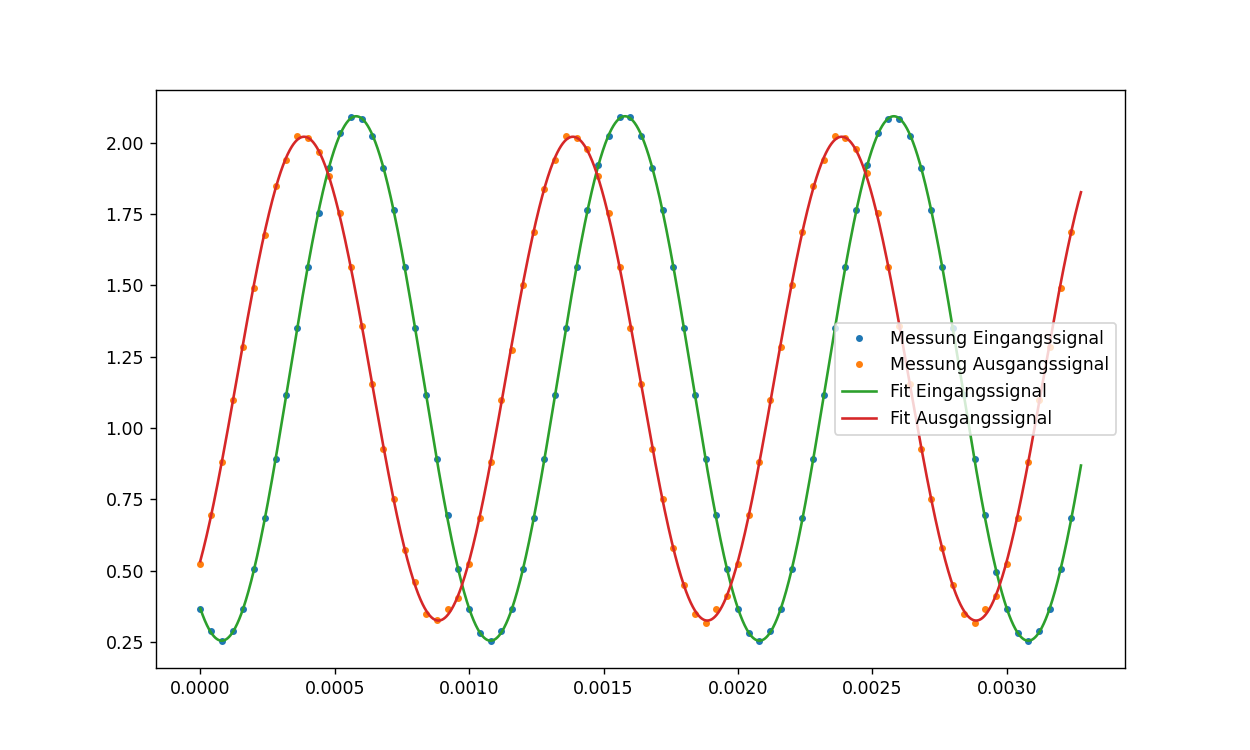

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(zeit_2[::50] , eingang_2[::50] , linestyle = "None" , marker = "." , label = "Messung Eingangssignal")
plt.plot(zeit_2[::50] , 3 * ausgang_2[::50] , linestyle = "None" , marker = "." , label = "Messung Ausgangssignal")
plt.plot(zeit_2 , sinus_eingang(zeit_2, *popt_3), label = "Fit Eingangssignal")
plt.plot(zeit_2 , 3* sinus_ausgang(zeit_2, *popt_4), label = "Fit Ausgangssignal")
plt.legend()

#### Und schließlich die Phasenverschiebung in Grad

In [19]:
print(popt_4[1] / 2 / np.pi * 360)

69.7869656863227


### Automatische Berechnung der Phasen aller Messreihen

<IPython.core.display.Javascript object>


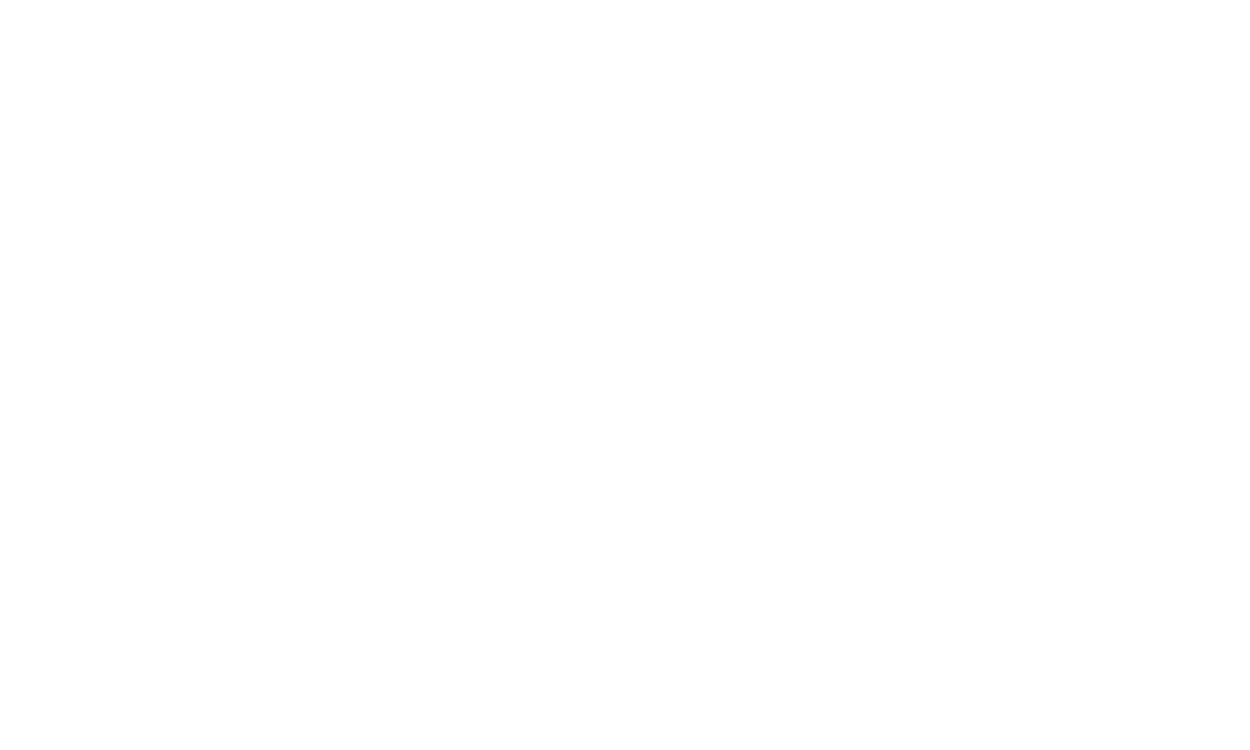

[69.78696569 55.89813922 45.20900661 37.35232235 31.59325205 27.28111937
 23.9286609  21.24416714 19.11370324 17.35712196]


In [20]:
scale_t = np.array([0.0001,10e-6,10e-6,10e-6, 5e-6, 5e-6, 5e-6, 5e-6, 5e-6, 5e-6])
scale_ch1 = np.array([0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
scale_ch2 = np.array([0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])

phase = np.array([])

plt.figure(figsize = (10, 6))
i = 1
while i < 11:
    zeit_1 , ausgang_1, eingang_1 = np.loadtxt("Messung3_Phase_" + str(i) + "k.txt", skiprows=10, unpack=True)
    
    zeit_2 = zeit_1 / 125 * scale_t[i-1]
    ausgang_2 = ausgang_1 / 32 * scale_ch1[i-1]
    eingang_2 = eingang_1 / 32 * scale_ch2[i-1]
    
    def sinus_eingang(t, Ue, phi_0, offset):
        return Ue * np.sin(2 * np.pi * 1000 * i * t + phi_0) + offset

    popt_3 , pcov_3 = curve_fit(sinus_eingang, zeit_2 ,eingang_2)
    
    def sinus_ausgang(t, Ue, phi, offset):
        return Ue * np.sin(2 * np.pi * 1000 * i * t + popt_3[1] + phi) + offset

    popt_4 , pcov_4 = curve_fit(sinus_ausgang, zeit_2 , ausgang_2)
    phase = np.append(phase, popt_4[1] / 2 / np.pi * 360)
    #print(popt_4[1] / 2 / np.pi * 360)
    i  += 1
print(phase)


#### Plot der Phase als Funtion der Frequenz

<IPython.core.display.Javascript object>


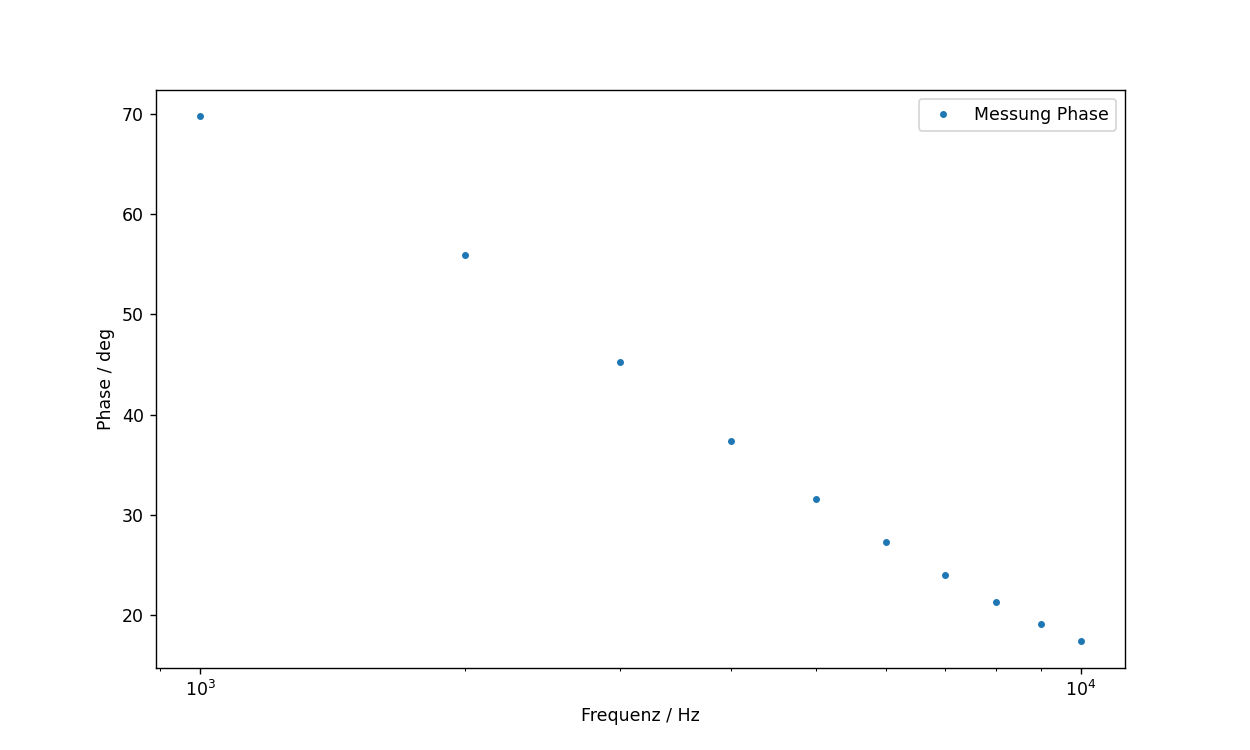

In [21]:
f = np.arange(1,11,1) *1000

plt.figure(figsize=(10, 6))
plt.plot(f , phase , linestyle = "None" , marker = "." , label = "Messung Phase")
plt.xscale("log")
plt.xlabel('Frequenz / Hz')
plt.ylabel('Phase / deg')
plt.legend()


#### Fitte eine Funktion an die Daten. Abbildung 6 im Skript. Plotte die Daten und die Fitfunktion.

<IPython.core.display.Javascript object>


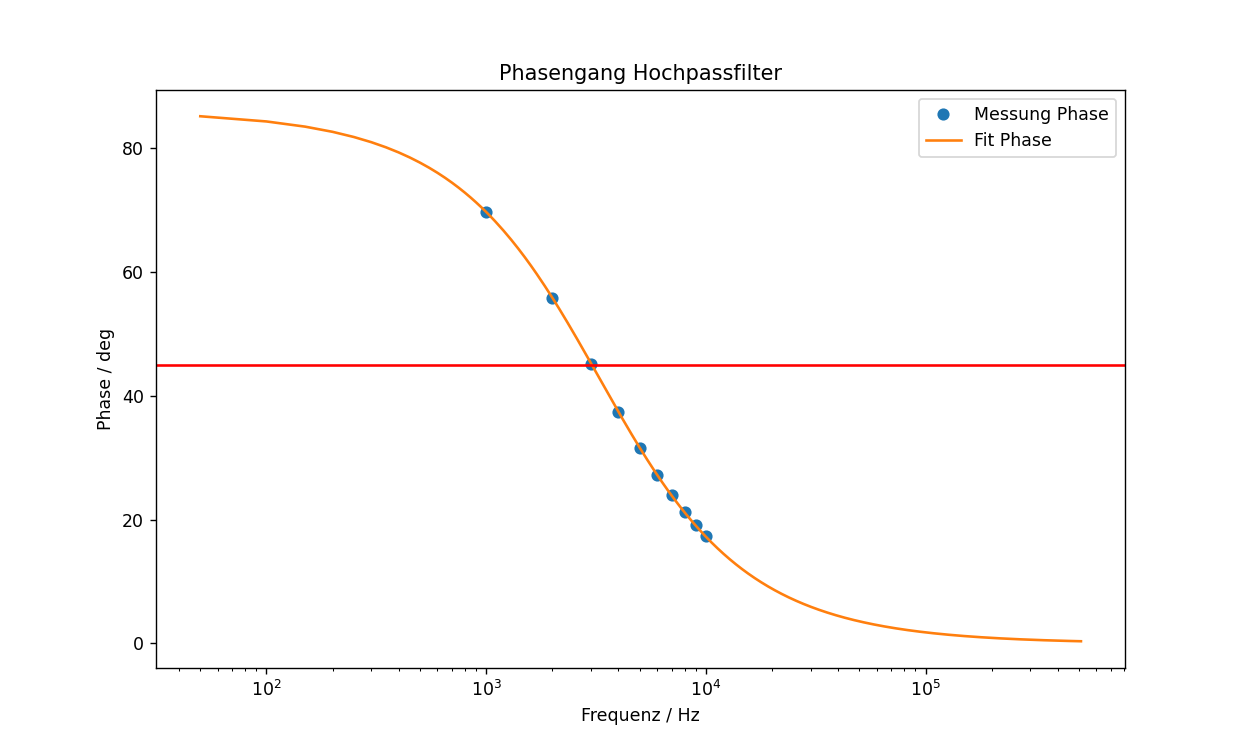

In [22]:
def fit_func(f, ampl , RC):
    return ampl * np.arctan(1/(-2*np.pi*f*RC))

popt , pcov = curve_fit(fit_func , f , phase)

plt.figure(figsize=(10, 6))
plt.plot(f , phase , linestyle = "None" , marker = "o" , label = "Messung Phase")
f_2 = np.arange(0.05,510,0.05) *1000
plt.plot(f_2 , fit_func(f_2, *popt), label = "Fit Phase")
plt.xscale("log")
plt.xlabel('Frequenz / Hz')
plt.ylabel('Phase / deg')
plt.legend()
plt.title("Phasengang Hochpassfilter")

plt.axhline(y=45, xmin=0, xmax=1, color='r')

#### Grenzfrequenz 1/RC

In [23]:
f_gr = 1/popt[1]/2/np.pi
print(f_gr)

#Phase bei f_gr
print(fit_func(f_gr, *popt))

3259.047835171334
43.02656748813186


### Aufgabe 4: Frequenzgang eines Serienschwingkreises

<IPython.core.display.Javascript object>


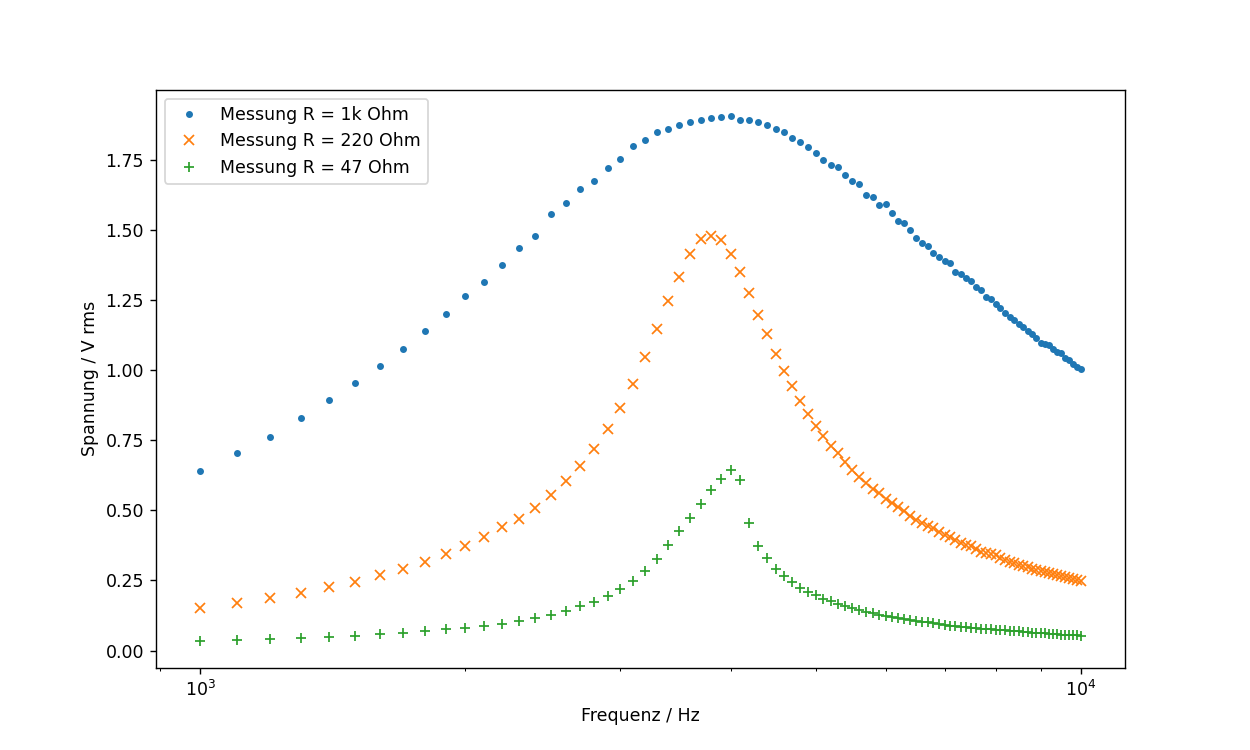

In [24]:
plt.figure(figsize=(10, 6))
frequenz_1k , effektivwert_1k , effekivwert_log_1k = np.loadtxt('Messung4_Bandpassfilter.txt', skiprows=1,
                                                      max_rows=91, unpack=True)

frequenz_220 , effektivwert_220 , effekivwert_log_220 = np.loadtxt('Messung4_Bandpassfilter.txt', skiprows=93,
                                                      max_rows=91, unpack=True)

frequenz_47 , effektivwert_47 , effekivwert_log_47 = np.loadtxt('Messung4_Bandpassfilter.txt', skiprows=185,
                                                      max_rows=91, unpack=True)


plt.plot(frequenz_1k , effektivwert_1k,  linestyle = "None" , marker = "." , label = "Messung R = 1k Ohm")
plt.plot(frequenz_220 , effektivwert_220,  linestyle = "None" , marker = "x" , label = "Messung R = 220 Ohm")
plt.plot(frequenz_47 , effektivwert_47,  linestyle = "None" , marker = "+" , label = "Messung R = 47 Ohm")


plt.xscale("log")
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()

#### Messwerte laden und plotten; R = 1 k Ohm

<IPython.core.display.Javascript object>


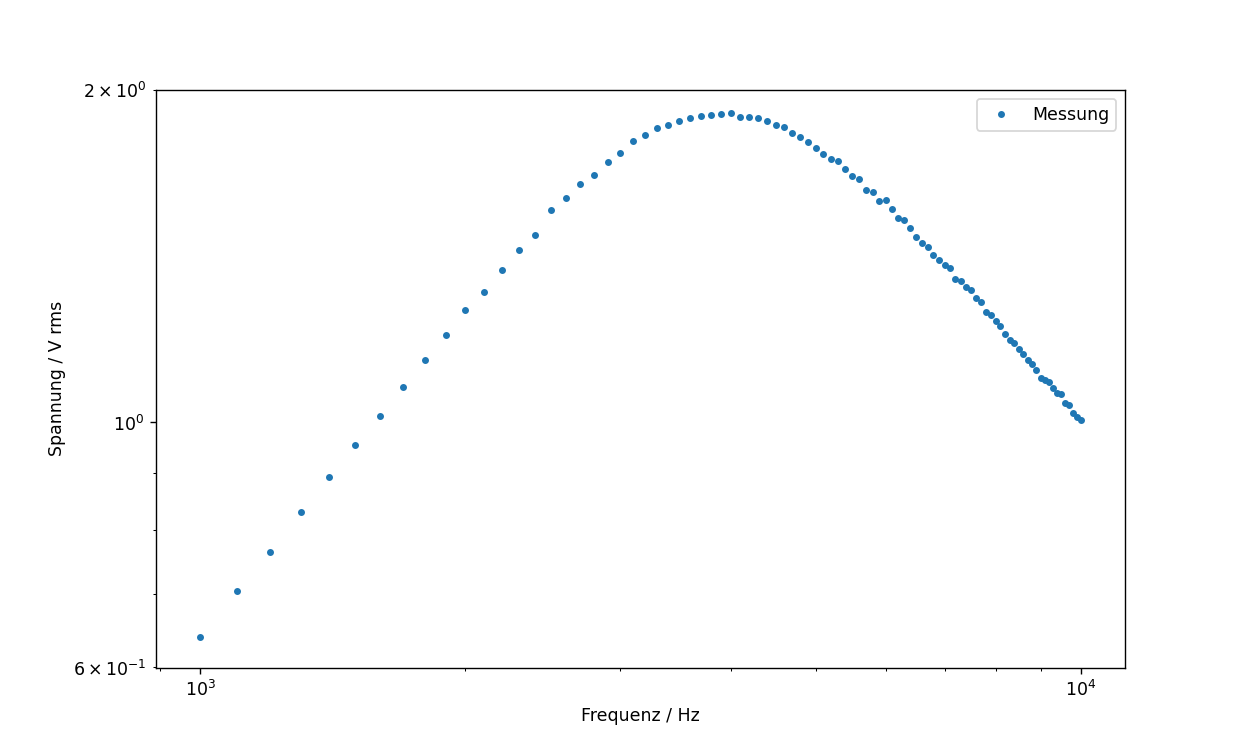

In [46]:
plt.figure(figsize=(10, 6))
frequenz , effektivwert , effekivwert_log = np.loadtxt('Messung4_Bandpassfilter.txt', skiprows=1,
                                                      max_rows=91, unpack=True)
plt.plot(frequenz , effektivwert , linestyle = "None" , marker = "." , label = "Messung")
plt.yscale("log")
plt.xscale("log")
plt.ylim(6e-1, 2)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()


#### Fitte eine Funktion an die Daten. Formel (49) im Skript. Plotte die Daten und die Fitfunktion.

<IPython.core.display.Javascript object>


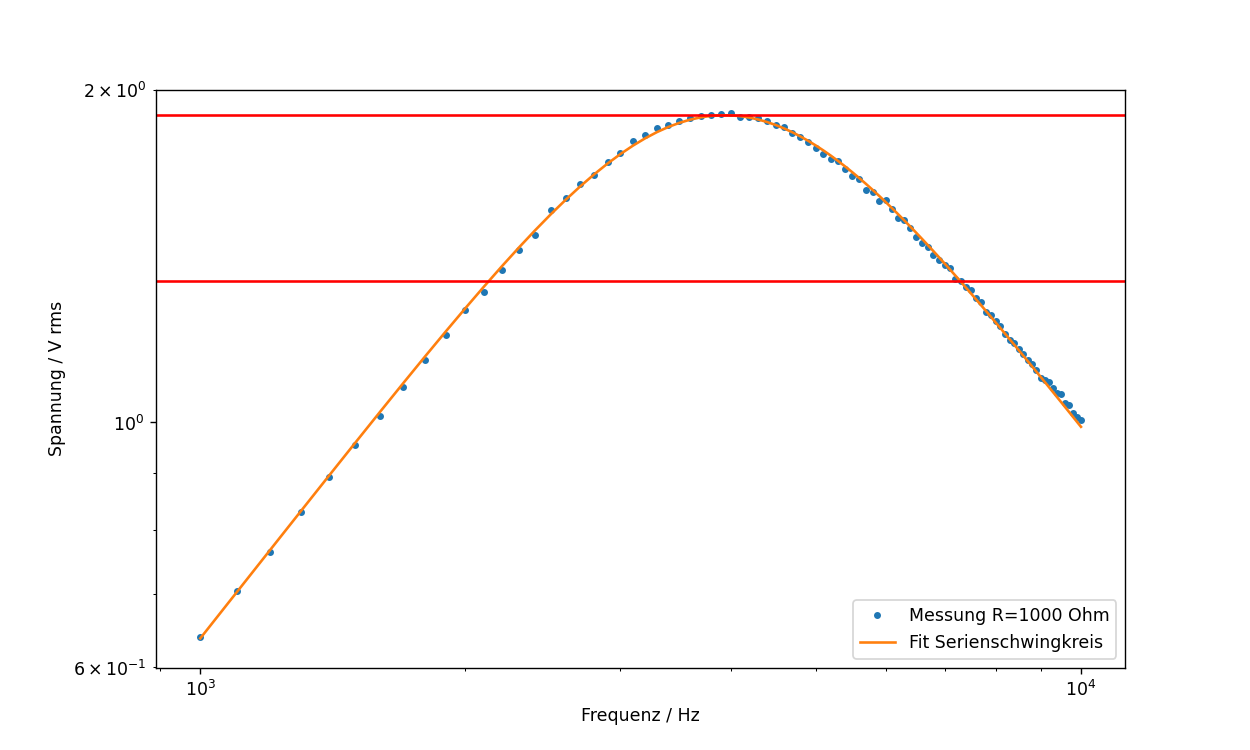

[1.89759863e+00 1.02790909e+03 3.16163479e-02 5.16723036e-08]


In [66]:
def fit_func(f, U_0, R , L , C):
    return U_0 * R /  np.sqrt(R**2 + (2*np.pi*f *L - 1/(2*np.pi*f *C))**2)

popt , pcov = curve_fit(fit_func , frequenz , effektivwert, p0=[1 , 1000, 1e-2 , 47e-9])

plt.figure(figsize=(10, 6))

plt.plot(frequenz , effektivwert , linestyle = "None" , marker = "." , label = "Messung R=1000 Ohm")
plt.plot(frequenz , fit_func(frequenz, *popt), label = "Fit Serienschwingkreis")

plt.yscale("log")
plt.xscale("log")
plt.ylim(6e-1, 2)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()

plt.axhline(y=1.90, xmin=0, xmax=1, color='r')
plt.axhline(y=1.90 / np.sqrt(2) , xmin=0, xmax=1, color='r')
print(popt)




In [38]:
print("Induktivität L1 = " + str(popt[2]) + " H")

Induktivität L1 = 0.03161634791089474 H


#### Induktivität berechnet aus der Resonanzfrequenz

In [67]:
f = 3980
L = 1 / ((2*np.pi *f) ** 2 * 47e-9)
print (L)

0.03402328641843942


#### Berechneter Verlustwiderstand aus Bandbreite

In [68]:
bandbreite = 7286 - 2122
R_V = bandbreite * 2 * np.pi * L - 1000
print (R_V)

103.93210321702009


#### Berechneter Verlustwiderstand aus Spannungsteiler

In [74]:
R = 1000
U_e = 1.96
U_a = 1.90

R_V = R * (U_e / U_a -1)
print(R_V)

31.57894736842115
